# Problemas de Valor de Frontera (Boundary Value Problems)

*(Basado en Numerical Analysis, 2nd Edition, Timothy Sauer)*

En general un problema de valor de frontera de segundo orden posee la siguiente estructura:

$$\begin{align*}y'' &= f(t,y,y') \\y(a) &= y_a \\y(b) &= y_b \end{align*}$$

donde $y(a)$ e $y(b)$ son las condiciones de borde para el problema que está definido en el intervalo $a \leq t \leq b$. La respuesta a este problema es una función $y(t)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

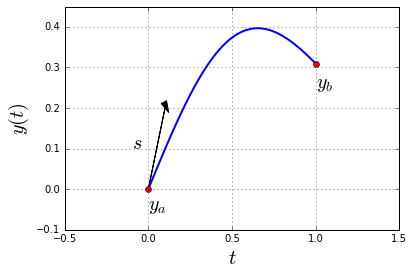

In [17]:
# Un ejemplo de función solución con condiciones de borde marcadas y pendiente s
def y(x):
    return np.exp(-x**2)*np.sin(x)
xx = np.linspace(0, 1, 100)
yy = y(xx)
plt.plot(xx,yy, lw=2)
plt.plot([0, 1] , [y(0), y(1)], 'ro', lw=2.0)
plt.arrow(0, 0, 0.1, 0.2, head_width=0.05, head_length=0.02, fc='k', ec='k')
plt.text(-0.1, 0.1, "$s$", fontsize=20)
plt.text(0, -0.05, "$y_a$", fontsize=20)
plt.text(1, 0.25, "$y_b$", fontsize=20)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.1, 0.45)
plt.grid()
plt.xlabel("$t$", fontsize=20)
plt.ylabel("$y(t)$", fontsize=20)
plt.show()

Ejemplo: **Encuentre la altura máxima para un proyectil lanzado desde 30 metros de altura y que alcanza el suelo en 4 segundos.**

En este caso, el problema puede plantearse dadas las leyes de Newton de movimiento como:

$$
\begin{align*}
y'' &= -g\\
y(0) &= 30\\
y(4) &= 0
\end{align*}
$$

Resolvemos vía integración de $y''$ pues ésta depende únicamente de $t$.

$$
\begin{align*}
y'(t) &= \int y''(t)\,dt = -gt + v_0\\
y(t) &= \int -gt + v_0 \, dt = -\frac{1}{2}gt^2 + v_0t + y_0
\end{align*}
$$

Las condiciones de borde nos permiten descubrir las constantes $v_0$ y $y_0$ pues $y(0) = y_0 = 30$ y $y(4) = -8g+v_0+30$, luego $v_0 \approx 12.12 $. Al obtener la solución analítica podemos descubrir la altura máxima del proyectil.

$$-gt + 12.12 = 0 \Rightarrow t \approx 1.236 \Rightarrow y_{max} \approx 37.5$$

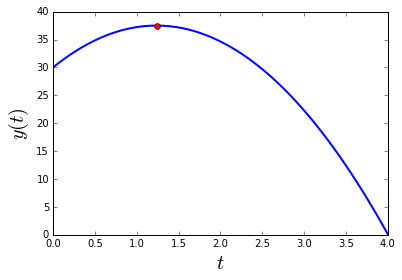

In [19]:
# Solución analítica para el BVP presentado
def y(t, v0, y0):
    return -0.5*9.8*t**2.0 + v0*t + y0

# Condiciones iniciales
a = 0
b = 4
y0 = 30
# Condiciones encontradas vía integración
v0 = 12.12
# Plot
tt = np.linspace(a, b, 100)
yy = y(tt, v0, y0)
plt.plot(tt, yy, lw=2.0)
plt.plot(1.236, 37.5, "ro", lw=2.0)
plt.xlabel("$t$", fontsize=20)
plt.ylabel("$y(t)$", fontsize=20)
plt.show()

## Shooting method

En general los problemas de valor inicial (IVP) tienen soluciones únicas. En cambio los problemas de valor de frontera (BVP) podrían no tener solución o tener infinitas soluciones. El *shooting method* es un método numérico para resolver BVP que trabaja bajo la premisa de encontrar el IVP que tiene la misma solución.

Dada una pendiente o *slope* $s_a$ inicial y un valor inicial $y_a$ generamos un IVP con solución $\hat{y}(t)$ y vemos si dicha solución tentativa se acerca a $y_b$. Por prueba y error iremos corrigiendo la pendiente $s_a$ hasta que la solución al IVP generado calce con $y_b$. El problema por lo tanto puede definirse como una función de $s$

$$
\begin{align*}
F(s) = \text{Diferencia entre } y_b \text{ y } y(b) \text{, donde } y(t) \text{ es la solución del IVP con } y(a) = y_a \text{ y } y'(a) = s
\end{align*}
$$

![alt text](images/bvp.png)

Como la función calcula una diferencia entre el valor de la condición de frontera y el valor de frontera del IVP, cuando ésta diferencia sea $0$ entonces habremos encontrado la solución al problema, es decir:
$$F(s) = 0$$

Por lo tanto nuestro problema de resolver BVP se reduce a una búsqueda de ceros para $F(s)$. Un método clásico para tal efecto es el método de bisección. Obviamente necesitamos dos pendientes $s_0$ y $s_1$ para establecer un intervalo con cambio de signo y buscar $s$ acá. Finalmente podemos buscar la solución final para el BVP como el IVP relacionado a la pendiente $s$:

$$\begin{align}
y'' = f(t, y, y')\\
y(a) = y_a\\
y'(a) = s^*
\end{align}
$$

### Ejemplo 1

Aplique el *shooting method* al BVP siguiente $$\begin{align}y'' = 4y\\y(0) = 1 \\ y(1) = 3\end{align}$$

**Solución:** Como vimos antes, necesitamos tratar al BVP como un IVP e intentar encontrar la pendiente que calce con el IVP que resuelve el BVP. Se requiere por lo tanto un cambio de variable afín, para que aparezca como restricción explícitamente la pendiente. Sea $y' = v$, el problema cambia entonces a:

$$
\begin{align*}v'=4y\\y' = v
\end{align*}
$$

Recordar que las condiciones iniciales deben ser $y(0) = 1$ y $y'(0) = s$. El siguiente código implementa la búsqueda del IVP que resuelve el BVP y grafica distintas aproximaciones.

-1.05123445706
0.762195782844
2.2541968292e-12


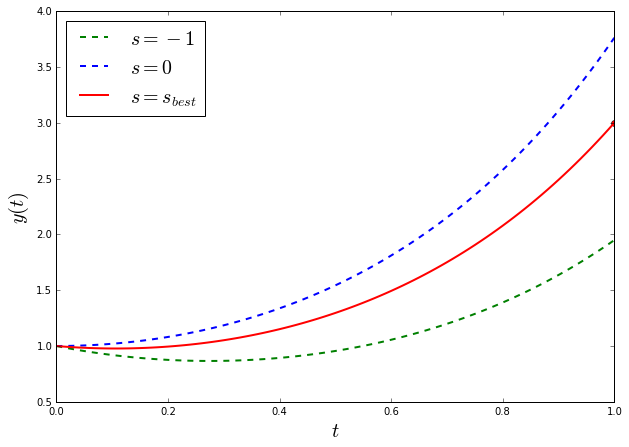

In [4]:
from scipy.integrate import odeint
from scipy.optimize import bisect

# Límites de t, la condición de borde yb y un array con muchos valores de t entre a y b
a, b = (0, 1)
yb = 3.0
t = np.linspace(a, b, 101)

# Recordar cambio de variable!
# v' = 4y
# y' = v

# Función para el solver donde declaramos el IVP
def yprime(_y, t):
    y, v = _y
    return [v, 4*y]


# Función donde buscamos el cero, i.e., donde buscamos pillar la 2da condición de borde.
def F(s):
    # Condición inicial del IVP que iremos cambiando, y'(0) = s, y(a0) = 1
    y0 = [1, s]
    # y, v
    sol = odeint(yprime, y0, t)
    return sol[:,0][-1] - yb

# Chequear F(-1)F(0) < 0 para método de bisección

# -1, 0
print(F(-1))
print(F(0))
sbest = bisect(F, -1, 0)
print(F(sbest))

## Gráficos
# 1) Para comparar generamos soluciones a los IVP con las pendientes que sospechamos
y1 = odeint(yprime, [1, -1], t)
y2 = odeint(yprime, [1, 0], t)
# 2) La gráfica de nuestra solución con mejor pendiente
ybest = odeint(yprime, [1, sbest], t)
# 3) Cháchara plotística (o sea, graficar las funciones)
plt.figure(figsize=(10,7))
plt.plot(1, 3, 'ro', lw=3.0)
plt.plot(t, y1[:,0], 'g--', lw=2.0, label="$s=-1$")
plt.plot(t, y2[:,0], 'b--', lw=2.0, label="$s=0$")
plt.plot(t, ybest[:,0],'r-', lw=2.0, label="$s=s_{best}$")
plt.legend(loc='best', fontsize=20)
plt.xlabel("$t$", fontsize=20)
plt.ylabel("$y(t)$", fontsize=20)
plt.show()

### Ejemplo 2

Aplique el *shooting method* al BVP siguiente problema 
$$
\begin{align*}y'' &= y + \frac{2}{3} e^t\\y(0) &= 0 \\ y(1) &= \frac{1}{3}e
\end{align*}
$$

Debemos identificar el IVP que al ajustarlo generará la solución al BVP. Si aplicamos el cambio de variable sugerido el sistema resulta ser...

-0.391733681114
0.783467543601
0.3333333032032897
-9.94426763157e-13


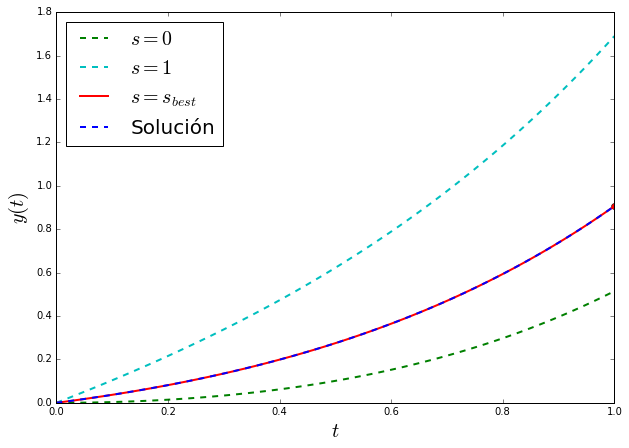

In [4]:
# Condiciones de borde e intervalo de tiempo
a, b = (0, 1)
yb = 1./3.*np.exp(1)
t = np.linspace(a, b, 101)

def yprime(_y, t):
    y, v = _y
    return [v, y + 2./3.*np.exp(t)]

def F(s):
    y0 = [0, s]
    sol = odeint(yprime, y0, t)
    return sol[:,0][-1] - yb


print(F(0))
print(F(1))
# Solución
sbest = bisect(F, 0, 1)
print(sbest)
print(F(sbest))

# Plot de aproximaciones
y1 = odeint(yprime, [0, 0], t)
y2 = odeint(yprime, [0, 1], t)
plt.figure(figsize=(10,7))
plt.plot(t, y1[:,0],'g--', lw=2.0, label="$s=0$")
plt.plot(t, y2[:,0],'c--', lw=2.0, label="$s=1$")
# Plot de resultado
ybest = odeint(yprime, [0, sbest], t)
plt.plot(1, yb, 'ro')
plt.plot(t, ybest[:,0],'r-', lw=2.0, label="$s=s_{best}$")
# Solución Analítica
plt.plot(t, 1./3.*t*np.exp(t), 'b--', lw=2.0, label="Solución")
plt.legend(loc='best', fontsize=20)
plt.xlabel("$t$", fontsize=20)
plt.ylabel("$y(t)$", fontsize=20)
plt.show()

### Ejemplo 3


Aplique el *shooting method* al BVP siguiente problema 
$$
\begin{align*}y'' &= 2e^{-2y}(1-t^2)\\y(0) &= 0 \\ y(1) &= \ln(2)
\end{align*}
$$

Debemos identificar el IVP que al ajustarlo generará la solución al BVP. Si aplicamos el cambio de variable sugerido el sistema resulta ser...

-0.588978772177
0.772928217278
-2.904653229052201e-08


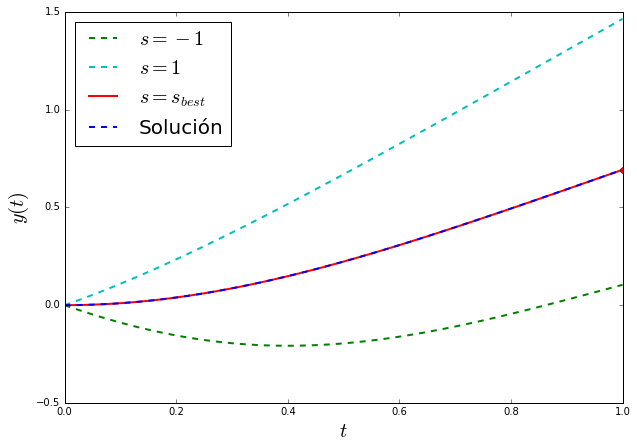

In [6]:
# Condiciones de borde e intervalo de tiempo
a, b = (0, 1)
yb = np.log(2.0)
t = np.linspace(a, b, 101)

def yprime(_y, t):
    y, v = _y
    return [v, 2.*np.exp(-2*y)*(1-t**2)]

def F(s):
    y0 = [0, s]
    sol = odeint(yprime, y0, t)
    return sol[:,0][-1] - yb


print(F(-1))
print(F(1))
# Solución
sbest = bisect(F, -1, 1)
print(sbest)
# Plot de aproximaciones
y1 = odeint(yprime, [0, -1], t)
y2 = odeint(yprime, [0, 1], t)
ybest = odeint(yprime, [0, sbest], t)

plt.figure(figsize=(10,7))
plt.plot(t, y1[:,0],'g--', lw=2.0, label="$s=-1$")
plt.plot(t, y2[:,0],'c--', lw=2.0, label="$s=1$")
plt.plot(t, ybest[:,0],'r-', lw=2.0, label="$s=s_{best}$")
# Solución Analítica
plt.plot(t, np.log(t**2.0 + 1), 'b--', lw=2.0, label="Solución")
plt.plot(1, yb, 'ro')
plt.legend(loc='best', fontsize=20)
plt.xlabel("$t$", fontsize=20)
plt.ylabel("$y(t)$", fontsize=20)
plt.show()

### Ejemplo 4

Aplicar el *shooting method* al sistema no lineal de BVPs 
$$
\begin{align*}
y'_1 &= \frac{1}{y_2}\\
y'_2 &= t+\tan(y_1)\\
y_1(0) &= 0\\
y_2(1) &= 2
\end{align*}
$$

Notemos que en este caso no tenemos una ecuación de segundo orden, simplemente es un BVP (tenemos valores de fronteras para las funciones que buscamos). Nos interesaría encontrar alguna condición inicial faltante, en este caso $y_2(0)$, con lo cual obtendríamos el IVP que debemos encontrar.

Al ser un sistema de ecuaciones, no es necesario el cambio de variable. Simplemente el solver deberá contener los valores explícitos de las derivadas $y'_1$ e $y'_2$. 

**Ojo:** El solver devuelve las estimaciones de $y_1$ e $y_2$. Anteriormente ignoramos ese hecho pues en ejercicios anteriores el solver devolvía estimaciones $y, v$, y nosotros descartábamos $v$ pues nos interesaba $y$.

Como la condición de borde en $t=b$ está dada para $y_2$, debemos comparar el resultado del solver para dicha función, es decir, necesitamos el retorno del solver completo (Ver el slicing realizado)

F(0.9) =  -0.0394943090694
F(1.1) =  0.0517925910229
sbest = 0.9999999642946932
F(sbest) =  -1.30673249998e-12


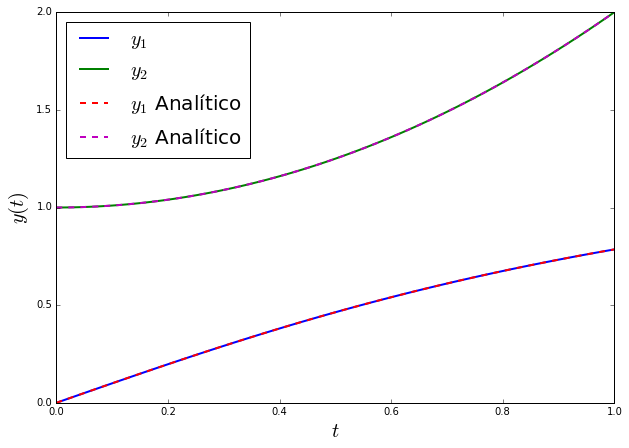

In [7]:
# Condiciones de borde e intervalo de tiempo
a, b = (0, 1)
y2_1 = 2.0
t = np.linspace(a, b, 101)

def yprime(_y, t):
    # En este caso "y" y "v" representan a y1 e y2
    y1, y2 = _y
    return [1.0 / y2,  t + np.tan(y1)]

def F(s):
    # y1_0 = 0, y2_0 = s
    y0 = [0, s]
    sol = odeint(yprime, y0, t, mxstep=100)
    return sol[:,1][-1] - y2_1


print("F(0.9) = ", F(0.9))
print("F(1.1) = ", F(1.1))

# Solución
sbest = bisect(F, 0.9, 1.1)
print("sbest =",sbest)
print("F(sbest) = ", F(sbest))

yy = odeint(yprime, [0, sbest], t)

# Plot de resultados
plt.figure(figsize=(10, 7))
plt.plot(t, yy[:, 0], lw=2.0, label="$y_1$")
plt.plot(t, yy[:, 1], lw=2.0, label="$y_2$")

# Plot analitico
y1 = np.arctan(t)
y2 = t**2.0 + 1
plt.plot(t, y1,  "r--", lw=2.0, label="$y_1$ Analítico")
plt.plot(t, y2,  "m--", lw=2.0, label="$y_2$ Analítico")
plt.legend(loc='best', fontsize=20)
plt.xlabel("$t$", fontsize=20)
plt.ylabel("$y(t)$", fontsize=20)
plt.xlim([0, 1])
plt.show()

El presente notebook ha sido creado para el curso ILI286 - Computación Científica 2, del Departamento de Informática, Universidad Técnica Federico Santa María. El material ha sido creado por Alejandro Sazo (asazo@alumnos.inf.utfsm.cl). En caso de encontrar un error, por favor no dude en contactar al email especificado. Puede encontrar la última versión del código en https://github.com/asazo/CC2